In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader


df = pd.read_csv('Iris.csv')

n
df = df.drop(columns=['Id'])


le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  

X = df.drop('Species', axis=1).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


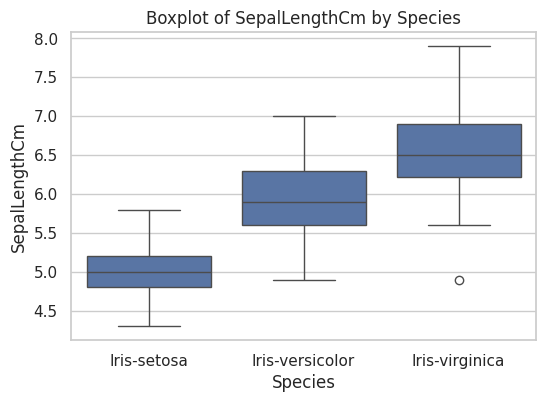

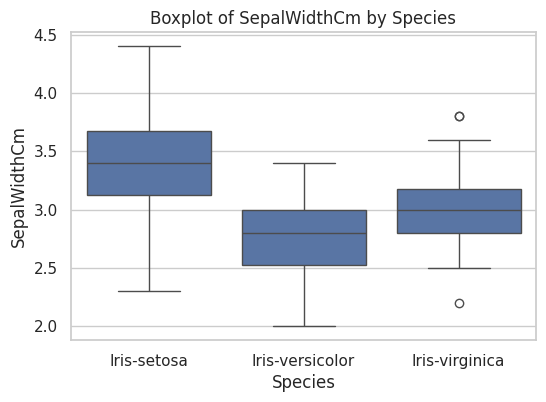

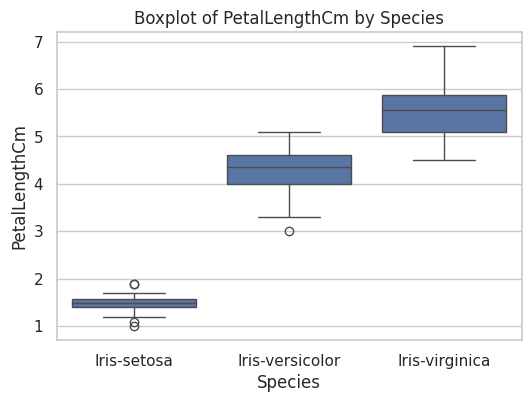

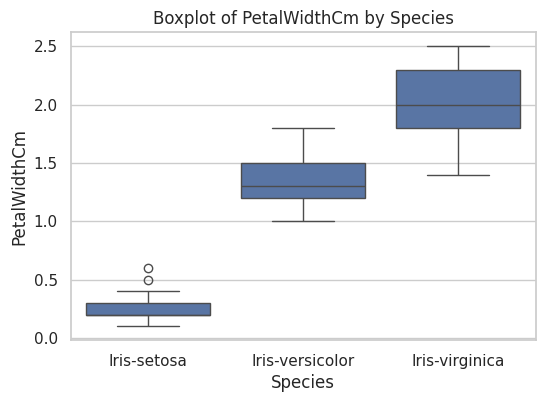

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')


sns.set(style="whitegrid")

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network architecture
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)  
        self.fc2 = nn.Linear(16, 3)  
    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)          # Output layer (no activation here for CrossEntropyLoss)
        return x

model = IrisNet()


criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 100
for epoch in range(1, epochs + 1):
    model.train()
    total_train_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
    
            train_preds = model(X_train_tensor)
            train_loss = criterion(train_preds, y_train_tensor).item()
            train_acc = accuracy_score(y_train_tensor.numpy(), train_preds.argmax(dim=1).numpy())

           
            test_preds = model(X_test_tensor)
            test_loss = criterion(test_preds, y_test_tensor).item()
            test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.argmax(dim=1).numpy())

       
            print(f"Epoch {epoch}:")
            print(f"  Train Loss = {train_loss:.4f}, Train Acc = {train_acc*100:.2f}%")
            print(f"  Test Loss  = {test_loss:.4f}, Test Acc  = {test_acc*100:.2f}%")

           
            test_losses.append(test_loss)
            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)


Epoch 10:
  Train Loss = 0.2226, Train Acc = 93.33%
  Test Loss  = 0.2729, Test Acc  = 86.67%
Epoch 20:
  Train Loss = 0.0990, Train Acc = 97.50%
  Test Loss  = 0.1447, Test Acc  = 96.67%
Epoch 30:
  Train Loss = 0.0625, Train Acc = 97.50%
  Test Loss  = 0.0901, Test Acc  = 96.67%
Epoch 40:
  Train Loss = 0.0507, Train Acc = 97.50%
  Test Loss  = 0.0754, Test Acc  = 96.67%
Epoch 50:
  Train Loss = 0.0438, Train Acc = 98.33%
  Test Loss  = 0.0694, Test Acc  = 96.67%
Epoch 60:
  Train Loss = 0.0401, Train Acc = 98.33%
  Test Loss  = 0.0689, Test Acc  = 96.67%
Epoch 70:
  Train Loss = 0.0369, Train Acc = 98.33%
  Test Loss  = 0.0714, Test Acc  = 96.67%
Epoch 80:
  Train Loss = 0.0378, Train Acc = 98.33%
  Test Loss  = 0.0750, Test Acc  = 96.67%
Epoch 90:
  Train Loss = 0.0351, Train Acc = 98.33%
  Test Loss  = 0.0741, Test Acc  = 96.67%
Epoch 100:
  Train Loss = 0.0337, Train Acc = 98.33%
  Test Loss  = 0.0826, Test Acc  = 96.67%


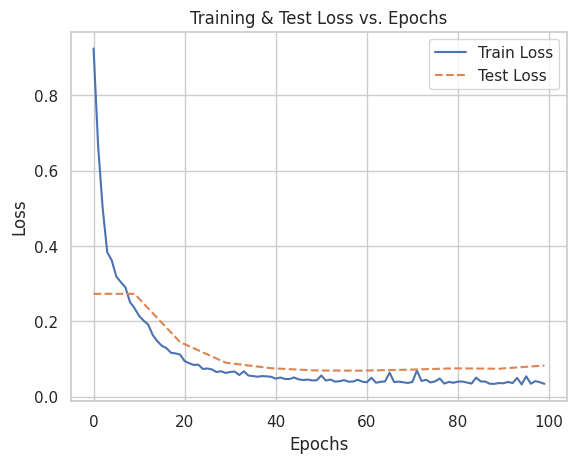

In [16]:
import matplotlib.pyplot as plt

# Interpolate test losses (logged every 10 epochs)
test_losses_interp = np.interp(range(epochs), np.arange(9, 100, 10), test_losses)

plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses_interp, label='Test Loss', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()


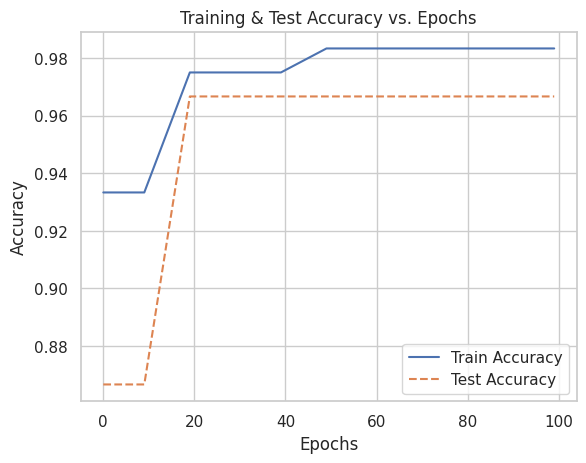

In [17]:
# Interpolate accuracies to match all 100 epochs
train_acc_interp = np.interp(range(epochs), np.arange(9, 100, 10), train_accuracies)
test_acc_interp = np.interp(range(epochs), np.arange(9, 100, 10), test_accuracies)

plt.plot(range(epochs), train_acc_interp, label='Train Accuracy')
plt.plot(range(epochs), test_acc_interp, label='Test Accuracy', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()


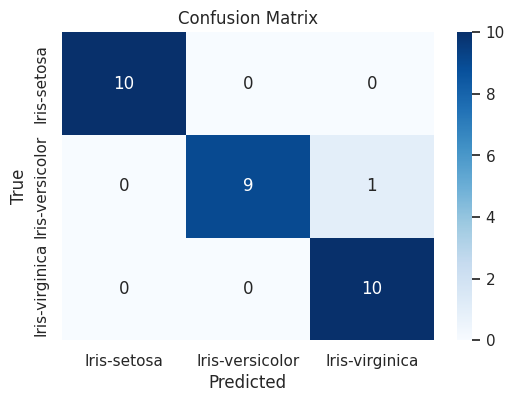

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).argmax(dim=1)

cm = confusion_matrix(y_test_tensor.numpy(), preds.numpy())
class_labels = le.classes_


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
